# NGC 1 Week 1 phase 1

## 1. Perkenalan

Nama : Harun

Batch : RMT -35

Objective : Melakukan sebuah analisis untuk memperkirakan perkiraan biaya premi asurasi yang kita bayarkan dengan menggunakan machine learning dari dataset yang berisi mengenai data asuransi di United States

## 2. Promblem Statement

### - Metode SMART

Specific: membuat model untuk memprediksi biaya asuransi

Measurable: model yang dibuat memiliki MAE dibawah dari 5

Achievable:
Dengan memanfaatkan model regresi linear, yang akan dilatih menggunakan dataset yang kita punya. Proses praproses data, pemilihan fitur, dan penyesuaian model akan diterapkan untuk meningkatkan akurasi prediksi.

Relevant:
Prediksi biaya asuransi yang akurat penting bagi pelanggan dan perusahaan asuransi untuk menentukan harga yang adil dan memahami faktor yang mempengaruhi biaya.

Time-bound:
Model akan diterapkan dan melakukan prediksi selama 3 bulan.

### - Machine Learning Model

Berdasarkan pernyataan masalah, tugas ini adalah memprediksi nilai kontinu (biaya asuransi kesehatan tahunan), sehingga model pembelajaran mesin yang tepat adalah Regression.

### - Problem Statement

membuat model untuk memprediksi biaya asuransi dengan MAE dibawah 5 yang diterapkan selama 3 bulan

## 3. Import Libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, pearsonr
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

## 4. Data Loading

In [147]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [148]:
#membuat copy dari dataset yang kita miliki

data_duplicate = data.copy()

In [149]:
#check dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Pada dataset terdapat 1337 baris data
- Pada dataset ini terdapat 7 kolom, dimana masing-masing data terdiri dari 3 kolom bertipe object, 2 kolom bertipe integer, dan 2 kolom bertipe float
- Tidak terlihat adanya missing value dari data entries pada masing-masing kolom yang artinya semua datanya terisi ridak ada data yang kosong

In [150]:
#deskriptif statistik
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- usia termuda pada dataset ini adalah 18 tahun. Usia tertua adalah 64 tahun.
- Rata-rata setiap orang dalam dataset memiliki 1 anak
- Bayaran asuransi yang dibayarkan termurah berada diangka 1121 dollar sedangkan harga asuransi tertinggai berada diangkat 63770 dollar

In [151]:
#deskriptif untuk object
data.describe(include="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


- pada kolom sex memiliki 2 nilai unik yang yaitu (male dan female) yang artinya ini adalah kolom gender
- Nilai yang paling sering muncul (modus) dalam kolom ini adalah "male".
- pada kolom smoker Terdapat 2 nilai unik dalam kolom smoker, yaitu "yes" (perokok) dan "no" (bukan perokok).
- Nilai yang paling sering muncul (modus) dalam kolom ini adalah "no", yang menunjukkan mayoritas orang dalam dataset bukan perokok.
- Terdapat 4 nilai unik dalam kolom region, yaitu "southeast", "southwest", "northeast", dan "northwest".
- Nilai yang paling sering muncul (modus) dalam kolom ini adalah "southeast".yang menandakan penduduk pada dataset ini berasal dari wilayah "southeast".

In [152]:
#melihat jumlah missing value
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

tidak ada jumlah missing value menandakan semua data sudah terisi

In [153]:
# mengecek data duplikat
data.duplicated().sum()

1

Terdapat 1 baris data yang duplicate, sehingga harus kita bersihkan dahulu.

In [154]:
# menampilkan baris yang duplikat
baris_duplikat = data[data.duplicated()]

baris_duplikat

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Terlihat baris yang terduplikasi yaitu baris ke 581.

In [155]:
# menghapus data duplikat
data = data.drop_duplicates()
# menampilkan data
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Terlihat data duplikat sudah terhapus yang dimana jumlah baris awalnya adalah 1338 sekarang sudah menjadi 1337

In [156]:
# mengecek jumlah data duplikat
data.duplicated().sum()

0

data duplikatnya sudah terhapus, dan sekarang sudah 0

## 5. EDA

### Analisis Spesifik untuk Mengukur Biaya Asuransi Berdasarkan Kebiasaan Merokok

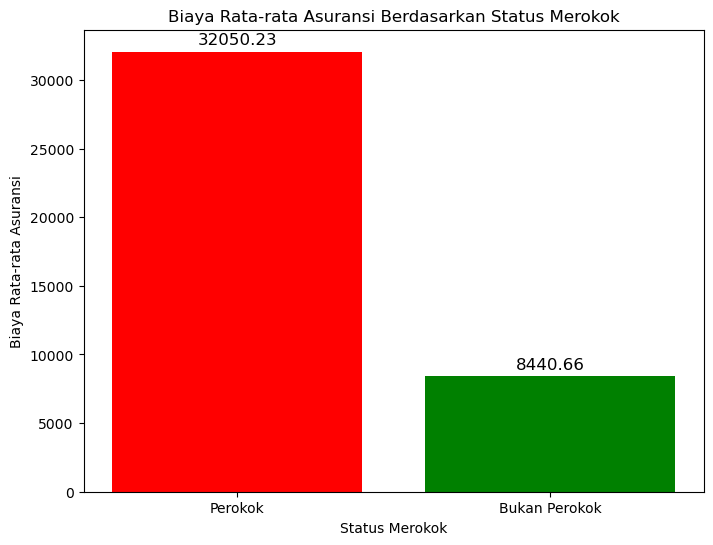

Biaya rata-rata asuransi untuk perokok: 32050.23183153284
Biaya rata-rata asuransi untuk bukan perokok: 8440.660306508937


In [157]:
# Menghitung biaya rata-rata asuransi untuk perokok dan bukan perokok
mean_charges_smoker = data[data['smoker'] == 'yes']['charges'].mean()
mean_charges_non_smoker = data[data['smoker'] == 'no']['charges'].mean()

# Membuat visualisasi
categories = ['Perokok', 'Bukan Perokok']
values = [mean_charges_smoker, mean_charges_non_smoker]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['red', 'green'])
plt.title('Biaya Rata-rata Asuransi Berdasarkan Status Merokok')
plt.ylabel('Biaya Rata-rata Asuransi')
plt.xlabel('Status Merokok')

# Menambahkan nilai pada masing-masing bar
for i in range(len(values)):
    plt.text(i, values[i] + 500, f'{values[i]:.2f}', ha='center', fontsize=12)

plt.show()

print("Biaya rata-rata asuransi untuk perokok:", mean_charges_smoker)
print("Biaya rata-rata asuransi untuk bukan perokok:", mean_charges_non_smoker)

1. Biaya Rata-rata Asuransi untuk Perokok: 32,050.23

Angka ini menunjukkan bahwa rata-rata biaya asuransi (charges) yang dibebankan kepada pelanggan yang merokok (smoker == 'yes') adalah sekitar 32,050.23.
Biaya rata-rata ini jauh lebih tinggi dibandingkan kelompok bukan perokok. Hal ini biasanya disebabkan oleh risiko kesehatan yang lebih tinggi yang terkait dengan kebiasaan merokok, sehingga perusahaan asuransi mengenakan premi yang lebih tinggi.

2. Biaya Rata-rata Asuransi untuk Bukan Perokok: 8,440.66

Angka ini menunjukkan bahwa rata-rata biaya asuransi (charges) yang dibebankan kepada pelanggan yang tidak merokok (smoker == 'no') adalah sekitar 8,440.66.
Biaya rata-rata ini lebih rendah karena orang yang tidak merokok umumnya dianggap memiliki risiko kesehatan yang lebih rendah dibandingkan perokok, sehingga premi asuransi yang dikenakan juga lebih rendah.

Ada perbedaan yang sangat signifikan antara biaya rata-rata asuransi untuk perokok dan bukan perokok, di mana perokok membayar hampir empat kali lipat lebih tinggi dibandingkan bukan perokok.

Ini menunjukkan bahwa status merokok adalah faktor risiko yang sangat memengaruhi premi asuransi. Oleh karena itu, kebijakan premi yang lebih tinggi bagi perokok mungkin digunakan untuk menutupi risiko tambahan yang dihadapi perusahaan asuransi.

### Mengukur Perbedaan dan Melakukan Uji Statistik

Untuk melihat apakah perbedaan antara perokok dan bukan perokok signifikan secara statistik, kita dapat menggunakan uji t (t-test):

In [158]:
# Menghitung uji t untuk biaya antara perokok dan bukan perokok
t_stat, p_value = ttest_ind(data[data['smoker'] == 'yes']['charges'], data[data['smoker'] == 'no']['charges'])

print("t-statistik:", t_stat)
print("p-value:", p_value)

# Evaluasi hasil
if p_value < 0.05:
    print("Ada perbedaan signifikan dalam biaya asuransi antara perokok dan bukan perokok.")
else:
    print("Tidak ada perbedaan signifikan dalam biaya asuransi antara perokok dan bukan perokok.")

t-statistik: 46.64479459840305
p-value: 1.4067220949376498e-282
Ada perbedaan signifikan dalam biaya asuransi antara perokok dan bukan perokok.


Karena p-value (1.41e-282) jauh lebih kecil dari tingkat signifikansi yang biasa digunakan (0.05), kita menolak hipotesis nol (H0). Ini berarti ada bukti kuat secara statistik bahwa:

Ada perbedaan yang sangat signifikan dalam biaya asuransi antara perokok dan bukan perokok.
Kelompok perokok dikenakan biaya asuransi yang secara signifikan lebih tinggi dibandingkan dengan kelompok bukan perokok.

Perbedaan ini bisa dijelaskan oleh risiko kesehatan yang lebih tinggi di antara perokok, yang meningkatkan biaya perawatan medis yang harus dikeluarkan oleh perusahaan asuransi. Oleh karena itu, perusahaan asuransi mengenakan premi yang lebih tinggi untuk perokok.

In [159]:
# menampilkan data frame hanya beberapa baris saja
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Mengkategorikan BMI
 
 Membuat kolom baru untuk mengklasifikasikan setiap peserta ke dalam kelas "overweight" yang sesuai berdasarkan nilai BMI mereka.
 
Dengan kategori:

- Overweight class 1: 30 ≤ BMI < 35
- Overweight class 2: 35 ≤ BMI < 40
- Overweight class 3: BMI ≥ 40

In [160]:
# Mengkategorikan peserta asuransi berdasarkan kelas overweight
def classify_overweight(bmi):
    if 30 <= bmi < 35:
        return 'Overweight Class 1'
    elif 35 <= bmi < 40:
        return 'Overweight Class 2'
    elif bmi >= 40:
        return 'Overweight Class 3'
    else:
        return 'Normal'

# Tambahkan kolom baru untuk overweight class
data['overweight_class'] = data['bmi'].apply(classify_overweight)
# menampilkan kolom bmi dan kolom overweight_clas yang telah kita buat
data[['bmi', 'overweight_class']].head()

C:\Users\dell\AppData\Local\Temp\ipykernel_3200\1395938727.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['overweight_class'] = data['bmi'].apply(classify_overweight)


,bmi,overweight_class
0,27.900,Normal
1,33.770,Overweight Class 1
2,33.000,Overweight Class 1
3,22.705,Normal
4,28.880,Normal


disini kita melihat kolom pada kategori overweight_class sudah ditambahkan

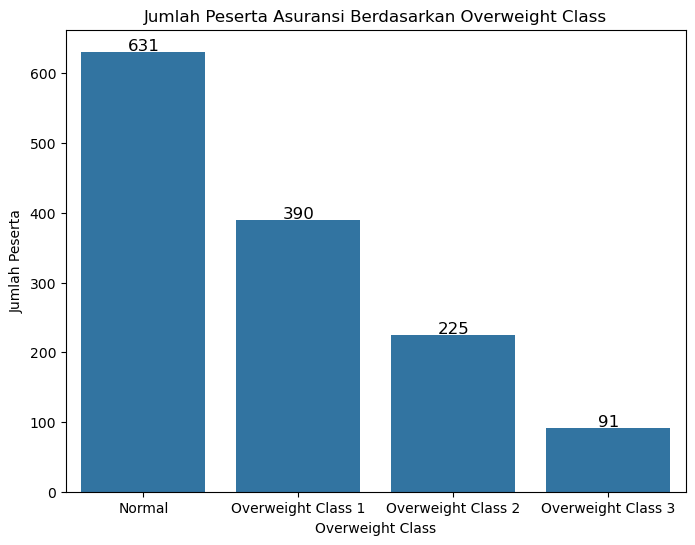

In [161]:
#  Menghitung jumlah peserta di setiap kelas overweight
count_overweight = data['overweight_class'].value_counts().sort_values(ascending=False)

# Visualisasi data dengan bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=count_overweight.index, y=count_overweight.values)
plt.xlabel('Overweight Class')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Asuransi Berdasarkan Overweight Class')
# Menampilkan nilai di atas setiap bar
for index, value in enumerate(count_overweight.values):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12)
plt.show()

disini kita melihat jumlah peserta asuransi berdasarkan overweight class
- normal = 631 jiwa
- overweight class 1 = 390 jiwa
- overweight class 2 = 225 jiwa
- overweight class 3 = 91 jiwa

karna muncul kategori normal maka kita hanya munculkan pada kategori overweightnya saja

In [162]:
# Menghitung jumlah peserta per kategori
count_overweight = data['overweight_class'].value_counts().drop('Normal')

# Mengurutkan dari jumlah terbanyak ke terkecil
count_overweight = count_overweight.sort_values(ascending=False)

# Menampilkan hasil
count_overweight

overweight_class
Overweight Class 1    390
Overweight Class 2    225
Overweight Class 3     91
Name: count, dtype: int64

Diatas terlihat jumlah dari masing-masing kategori overweight dari dataset yang kita miliki.

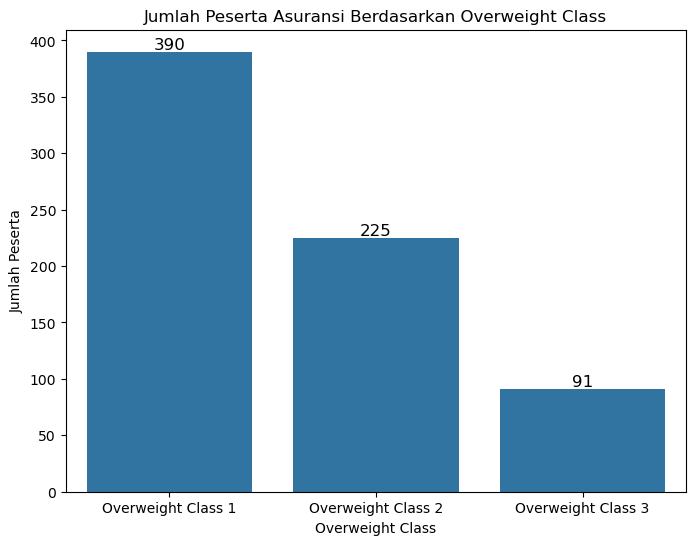

In [163]:
# Visualisasi data dengan bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=count_overweight.index, y=count_overweight.values)
plt.xlabel('Overweight Class')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Asuransi Berdasarkan Overweight Class')
# Menampilkan nilai di atas setiap bar
for index, value in enumerate(count_overweight.values):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12)
plt.show()

Visualisasi menggunakan barplot, terlihat dalam dataset overweight class 1 merupakan kategori yang paling banyak dibandingkan dengan overweight class 2 dan 3.

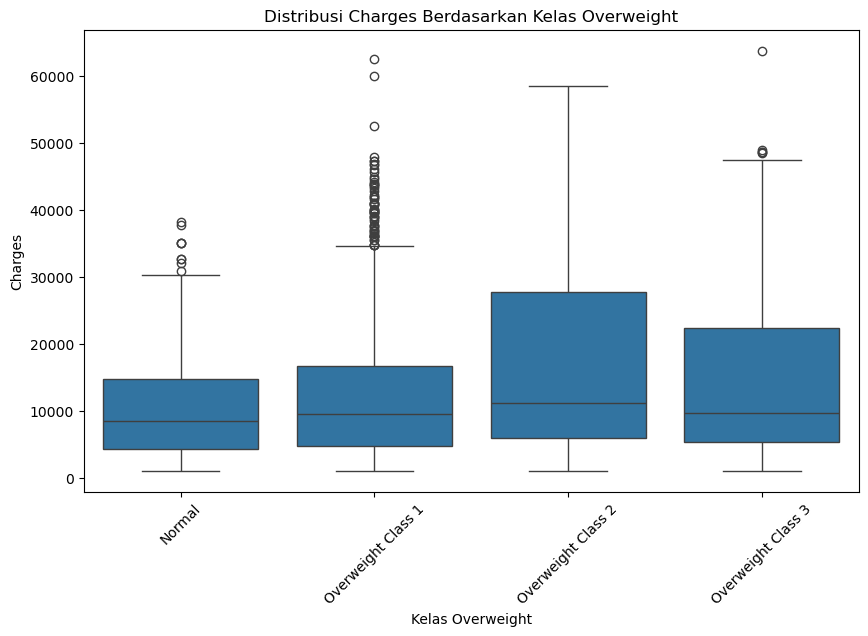

                            mean       median
overweight_class                             
Normal              10713.666901   8604.48365
Overweight Class 1  14452.444487   9573.46115
Overweight Class 2  17022.258883  11264.54100
Overweight Class 3  16784.615546   9748.91060


In [164]:
# Rata-rata dan Median Charges berdasarkan kelas overweight
charges_stats = data.groupby('overweight_class')['charges'].agg(['mean', 'median'])
# Visualisasi distribusi Charges berdasarkan kelas overweight
plt.figure(figsize=(10, 6))
sns.boxplot(x='overweight_class', y='charges', data=data)
plt.title('Distribusi Charges Berdasarkan Kelas Overweight')
plt.xlabel('Kelas Overweight')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()

print(charges_stats)

Normal:

Rata-rata Charges: 10.713.67
Median Charges: 8.604.48
Untuk kelompok ini, rata-rata biaya asuransi lebih tinggi dibandingkan dengan median, menunjukkan bahwa ada beberapa peserta dengan biaya asuransi yang sangat tinggi yang menaikkan rata-rata.

Overweight Class 1:

Rata-rata Charges: 14.452.44
Median Charges: 9.573.46
Kelompok ini memiliki rata-rata biaya asuransi yang lebih tinggi dibandingkan dengan kelompok Normal. Median juga lebih tinggi dari kelompok Normal, menunjukkan bahwa biaya asuransi lebih tinggi secara umum di kelompok ini.

Overweight Class 2:

Rata-rata Charges: 17.022.26
Median Charges: 11.264.54
Kelompok ini menunjukkan biaya asuransi tertinggi di antara semua kelas overweight. Rata-rata dan median biaya asuransi juga lebih tinggi dibandingkan dengan kelompok Overweight Class 1. Ini menunjukkan bahwa peserta di kelompok ini cenderung memiliki biaya asuransi yang lebih tinggi.

Overweight Class 3:

Rata-rata Charges: 16.784.62
Median Charges: 9.748.91
Kelompok ini memiliki rata-rata biaya asuransi yang tinggi, tetapi median-nya lebih rendah dibandingkan dengan Overweight Class 2. Ini menunjukkan bahwa ada variasi yang signifikan dalam biaya asuransi di antara peserta di kelompok ini.

Secara keseluruhan, hasil ini menunjukkan bahwa peserta dengan kelas overweight yang lebih tinggi umumnya menghadapi biaya asuransi yang lebih tinggi, dan perbedaan ini semakin besar dengan peningkatan kelas overweight.

### melihat hubungan antara usia dan biaya asuransi dalam setiap kelas overweight.

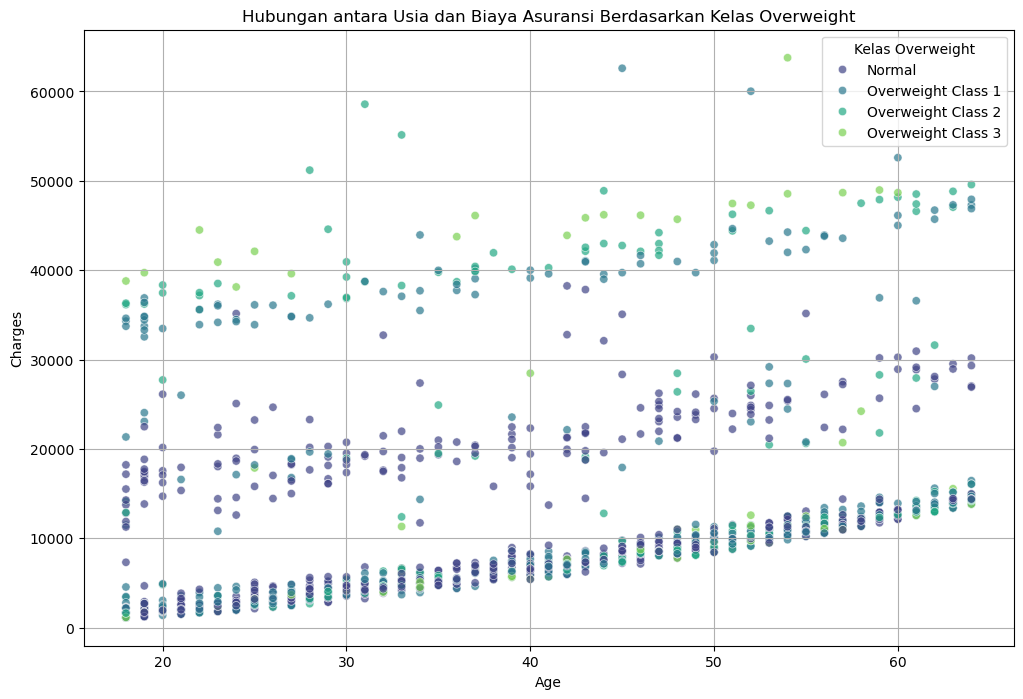

In [165]:
# Visualisasi hubungan antara usia dan biaya asuransi berdasarkan kelas overweight
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='charges', hue='overweight_class', data=data, alpha=0.7, palette='viridis')
plt.title('Hubungan antara Usia dan Biaya Asuransi Berdasarkan Kelas Overweight')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Kelas Overweight')
plt.grid(True)
plt.show()

Grafik ini menunjukkan bahwa baik usia maupun kelas overweight memiliki pengaruh yang signifikan terhadap biaya asuransi kesehatan. Semakin tua usia seseorang dan semakin tinggi kelas overweight-nya, maka semakin besar kemungkinan ia harus membayar biaya asuransi yang lebih tinggi.

## 6. Feature Engineering 

Setelah kita melakukan EDA tahap selanjutnya kita akan membuat feature engineering 
disini kita akan menentukan feature feature mana yang akan kita pakai dan fiture mana yang akan kita tidak pakai dan bisa kita drop. 

kita akan menggunakan kolom price sebagai target/label.

### Handling Cardinality

In [166]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(data.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, data[col].nunique(), data[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[female, male]"
1,smoker,2,"[yes, no]"
2,region,4,"[southwest, southeast, northwest, northeast]"
3,overweight_class,4,"[Normal, Overweight Class 1, Overweight Class 2, Overweight Class 3]"


Dari tabel di atas kita bisa tahu bahwa kolom kategorikal pada data kita itu memiliki nilai uniquie kurang dari sama dengan 4. Dengan mengetahui ini kita tidak perlu handling kolom dengan high cardinality karena nilai 4 ini tidak memiliki kardinal yang tinggi.

### Split Betweet X (Features) and Y (target)

In [167]:
# Memisahkan fitur (X) dan label (y)
X = data.drop('charges', axis=1)  # Semua kolom kecuali 'charges' axis=1 menunjukkan bahwa kita ingin menghapus kolom (bukan baris).
y = data['charges']  # Kolom target
X

,age,sex,bmi,children,smoker,region,overweight_class
0,19,female,27.900,0,yes,southwest,Normal
1,18,male,33.770,1,no,southeast,Overweight Class 1
2,28,male,33.000,3,no,southeast,Overweight Class 1
3,33,male,22.705,0,no,northwest,Normal
4,32,male,28.880,0,no,northwest,Normal
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,Overweight Class 1
1334,18,female,31.920,0,no,northeast,Overweight Class 1
1335,18,female,36.850,0,no,southeast,Overweight Class 2
1336,21,female,25.800,0,no,southwest,Normal


Langkah ini bertujuan untuk memisahkan data menjadi fitur (X) dan label (y)

X digunakan oleh model untuk belajar pola dari data.
y adalah nilai yang ingin diprediksi oleh model berdasarkan pola yang dipelajari dari X

Hasilnya adalah DataFrame X yang berisi semua fitur kecuali kolom target (charges).
y = data['charges']:
Variabel y menyimpan kolom charges, yang merupakan label atau target yang ingin diprediksi oleh model.

### Splitting between Train Set and Test set

Sebelum model dibangun, dataset dibagi menjadi data train dan data test. Model dibangun dengan data train, dan model dievaluasi dengan data test. Kita dapat menggunakan metode train_test_split di scikit-learn untuk membagi dataset menjadi training dan testing. Dengan metode ini, kita dapat dengan mudah membagi dataset.

Fungsi train_test_split

train_test_split adalah fungsi dari library Scikit-Learn (sklearn), yang digunakan untuk membagi dataset menjadi dua subset:

- Training set (X_train, y_train): Bagian data yang digunakan untuk melatih model, sehingga model dapat belajar dari data ini untuk mengenali pola-pola dalam data.

- Testing set (X_test, y_test): Bagian data yang digunakan untuk menguji kinerja model setelah dilatih, sehingga kita dapat mengevaluasi seberapa baik model memprediksi nilai yang sebenarnya.

In [168]:
#Splitting training & testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1069, 7)
Test Size (268, 7)


output ini menunjukkan bahwa dataset telah berhasil dibagi menjadi dua bagian untuk pelatihan dan pengujian model, sesuai dengan rasio pembagian yang telah ditentukan.

### Handling Outlier

Setelah melakukan pemisahan dan tidak ada penambahan fitur selanjutnya kita handling outlier.

In [169]:
#check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,age,0.1,normal
1,bmi,0.3,normal
2,children,1.0,skewed


Semua data terdistribusi normal kecuali kolom children. Selanjutnya, akan dilihat batas atas dan batas bawah dan presentase outlier pada masing-masing kolom

In [170]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,age,81.73,-3.64,0.00
1,bmi,48.95,12.31,0.28
2,children,8.00,-6.00,0.00


Nilai usia (age) yang dianggap wajar berada di antara -3.64 (batas bawah) dan 81.73 (batas atas).
Dalam konteks usia, nilai negatif tidak masuk akal. Batas bawah ini mungkin menunjukkan bahwa tidak ada nilai usia yang lebih rendah dari nol.
0% berarti tidak ada data usia yang keluar dari rentang batas atas atau bawah ini, jadi tidak ada outlier di kolom age.

Sebanyak 0.28% dari total data BMI dianggap outlier karena berada di luar batas-batas tersebut.
Ini menunjukkan bahwa ada beberapa nilai BMI yang cukup tinggi atau rendah sehingga dianggap sebagai outlier.

0% berarti tidak ada data jumlah anak yang keluar dari rentang batas atas atau bawah ini, jadi tidak ada outlier di kolom children.
Batas bawah negatif (-6) mungkin hanya hasil perhitungan statistik, karena jumlah anak tidak mungkin negatif. Ini menunjukkan bahwa tidak ada nilai yang lebih rendah dari 0.

- Kolom age dan children: Tidak memiliki outlier, karena semua data berada dalam rentang batas atas dan bawah yang wajar.
- Kolom bmi: Memiliki sedikit outlier (0.28% dari total data), yang mungkin mewakili orang dengan BMI yang sangat rendah atau sangat tinggi.

Tidak Ada Outlier pada age dan children: Tidak memerlukan tindakan khusus, karena tidak ada nilai yang berada di luar batas wajar.



Selanjutnya menggunakan Capping untuk Menangani outlier untuk mengurangi dampak dari outlier dengan membatasi nilai maksimum atau minimum dari data ke batas yang wajar, tanpa menghapus data tersebut.

In [171]:
# untuk pengecekan outlier pada bmi apakah titik maksimal sudah berubah
X_train['bmi'].max()

53.13

In [172]:
# penggunaan winsorizer/capping untuk mengganti outlier dengan penggunaan batas terakhir dari sebaran data tertinggi atau terendah

winsoriser_bmi = Winsorizer(capping_method='gaussian', # Metode capping berdasarkan distribusi Gaussian (Normal).
                            tail='right',   # Menentukan sisi (tail) distribusi mana yang akan dicapping. right berarti capping dilakukan di sisi kanan distribusi (outlier yang lebih tinggi).
                            fold=3,
                            variables=['bmi'],
                            missing_values='ignore')

X_train_capped = winsoriser_bmi.fit_transform(X_train)
X_test_capped = winsoriser_bmi.transform(X_test)

data sudah diganti dan kita cek dibawahnya

In [173]:
X_train_capped['bmi'].max()

48.93744912847302

### Handling Missing Value

In [174]:
X_train_capped.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
overweight_class    0
dtype: int64

Tidak ada missing value pada semua kolom atau fitur pada train dataset

In [175]:
X_test_capped.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
overweight_class    0
dtype: int64

tidak ada missing value pada test dataset

### Split Between Numeric Columns and Categorical Columns

In [176]:
# Get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()

cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['age', 'bmi', 'children']
Categorical Columns :  ['sex', 'smoker', 'region', 'overweight_class']


In [177]:
#pemisahan antara kategori dan non kategori

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,bmi,children
161,18,36.850,0
1033,18,21.565,0
151,48,29.700,0
760,22,34.580,2
362,19,21.700,0
...,...,...,...
278,59,31.790,2
432,42,26.900,0
1284,61,36.300,1
1266,55,30.500,0


### Feature Selection

In [178]:
X_train

,age,sex,bmi,children,smoker,region,overweight_class
161,18,female,36.850,0,yes,southeast,Overweight Class 2
1033,18,male,21.565,0,yes,northeast,Normal
151,48,male,29.700,0,no,southeast,Normal
760,22,female,34.580,2,no,northeast,Overweight Class 1
362,19,female,21.700,0,yes,southwest,Normal
...,...,...,...,...,...,...,...
278,59,male,31.790,2,no,southeast,Overweight Class 1
432,42,male,26.900,0,no,southwest,Normal
1284,61,male,36.300,1,yes,southwest,Overweight Class 2
1266,55,female,30.500,0,no,southwest,Overweight Class 1


Setelah melakukan EDA di atas kita tahu bahwa ternyata rata2 premi per region tidak ada maka kita sisihkan region dan kita tidak pakai fitur tersebut.

In [179]:
X_train_cat.drop(['region'], axis = 1 , inplace = True)
X_test_cat.drop(['region'], axis = 1, inplace= True) 
X_train_cat

C:\Users\dell\AppData\Local\Temp\ipykernel_3200\397194895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop(['region'], axis = 1 , inplace = True)
C:\Users\dell\AppData\Local\Temp\ipykernel_3200\397194895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop(['region'], axis = 1, inplace= True)


,sex,smoker,overweight_class
161,female,yes,Overweight Class 2
1033,male,yes,Normal
151,male,no,Normal
760,female,no,Overweight Class 1
362,female,yes,Normal
...,...,...,...
278,male,no,Overweight Class 1
432,male,no,Normal
1284,male,yes,Overweight Class 2
1266,female,no,Overweight Class 1


### Correlation using kendall and pearson

kendal tau first

In [180]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,sex,ga ada korelasi
1,smoker,ada korelasi
2,overweight_class,ada korelasi


Ternyata kolom sex dan kolom target ga ada korelasi maka kita bisa drop itu

In [181]:
X_train_cat.drop(['sex'], axis = 1 , inplace = True)
X_test_cat.drop(['sex'], axis = 1, inplace= True) 
X_train_cat

C:\Users\dell\AppData\Local\Temp\ipykernel_3200\2824198284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop(['sex'], axis = 1 , inplace = True)
C:\Users\dell\AppData\Local\Temp\ipykernel_3200\2824198284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop(['sex'], axis = 1, inplace= True)


,smoker,overweight_class
161,yes,Overweight Class 2
1033,yes,Normal
151,no,Normal
760,no,Overweight Class 1
362,yes,Normal
...,...,...
278,no,Overweight Class 1
432,no,Normal
1284,yes,Overweight Class 2
1266,no,Overweight Class 1


In [182]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,smoker,ada korelasi
1,overweight_class,ada korelasi


kolom sex sudah terhapus pada kolom kategorikal

Pearson Second

In [183]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,age,ada korelasi
1,bmi,ada korelasi
2,children,ada korelasi


Semua memiliki korelasi jadi kita pertahankan saja

#### Kesimpulan Fitur Selection

Setelah melakukan testing menggunakan kendal dan pearson serta perlakuan sendiri dari EDA, kita menggunakan faktor smoker, overweight_clas sebagai fitur(kolom) pada data kategorikal. kita juga disini memilih fitur age bmi children pada kolom numerikal berdasarkan pearson korelasion test.
Dari hasil feature selection, maka semua feature yang mempunyai korelasi akan dimasukkan ke model.

### Feature Scaling

In [184]:
#Scaling menggunakan minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.        , 0.5517004 , 0.        ],
       [0.        , 0.13079994, 0.        ],
       [0.65217391, 0.35481206, 0.        ],
       ...,
       [0.93478261, 0.53655514, 0.2       ],
       [0.80434783, 0.37684153, 0.        ],
       [0.45652174, 0.36100785, 0.2       ]])

### Feature Encoding

In [185]:
# melihat bentukan category grup
X_train_cat.head()

,smoker,overweight_class
161,yes,Overweight Class 2
1033,yes,Normal
151,no,Normal
760,no,Overweight Class 1
362,yes,Normal


In [186]:
# Using Ordinal Encoder
encoder = OrdinalEncoder(categories= [['no','yes'],['Normal','Overweight Class 1','Overweight Class 2','Overweight Class 3']])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[1., 2.],
       [1., 0.],
       [0., 0.],
       ...,
       [1., 2.],
       [0., 1.],
       [1., 0.]])

Menggabungkan data categori dan data numeric setelah di scaling

### Concate Between Numeric Columns and Categorical Columns

In [187]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_encoded], axis = 1)

X_train_final

array([[0.        , 0.5517004 , 0.        , 1.        , 2.        ],
       [0.        , 0.13079994, 0.        , 1.        , 0.        ],
       [0.65217391, 0.35481206, 0.        , 0.        , 0.        ],
       ...,
       [0.93478261, 0.53655514, 0.2       , 1.        , 2.        ],
       [0.80434783, 0.37684153, 0.        , 0.        , 1.        ],
       [0.45652174, 0.36100785, 0.2       , 1.        , 0.        ]])

## 6. Model Definition

In [188]:
model_lin_reg = LinearRegression()

## 7. Model Training

In [189]:
#Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

## 8. Model Evaluation

In [190]:
#Lihat hasil prediksi

y_pred_train = model_lin_reg.predict(X_train_final)

y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([27954.12632771, 23498.44493739,  9115.33459433, ...,
       39646.62123095, 12240.43120461, 30637.11685607])

In [191]:
y_train

161     36149.48350
1033    13747.87235
151      7789.63500
760      3925.75820
362     13844.50600
           ...     
278     12928.79110
432      5969.72300
1284    47403.88000
1266    10704.47000
1278    22462.04375
Name: charges, Length: 1069, dtype: float64

In [197]:
#Model Evaluation using MAE

print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test set: ', mean_absolute_error(y_test, y_pred_test))

Error - Train set :  3945.3530523942077
Error - Test set:  4607.146103756073


Hasil Evaluasi

Error - Train set: 3945.35

- Nilai MAE pada data pelatihan adalah 3945.35.
- Ini berarti rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya pada data pelatihan adalah sekitar 3945.35.

Error - Test set: 4607.15

- Nilai MAE pada data pengujian adalah 4607.15.
- Ini berarti rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya pada data pengujian adalah sekitar 4607.15.

Nilai MAE yang lebih rendah pada data pelatihan berarti model melakukan prediksi yang cukup baik pada data yang telah dilatih.

Nilai MAE yang lebih tinggi pada data pengujian mengindikasikan bahwa model mengalami sedikit penurunan performa pada data baru, yang bisa dianggap normal dalam banyak kasus.

In [195]:
print ('RMSE Test' , root_mean_squared_error(y_test,y_pred_test))   

RMSE Test 6892.755013635762


RMSE 6892 Nilai RMSE yang lebih tinggi pada data pengujian dibandingkan dengan nilai MAE yang sebelumnya (sekitar 4607.15)

In [196]:
print ('R square Test' , r2_score(y_test,y_pred_test))

R square Test 0.734883944440021


Nilai 0.7349 berarti sekitar 73.49% menunjukkan model bisa memprediksi dengan baik sebesar 73.49% namun, sisa 26.51% nya model belum bisa memprediksi dengan baik mungkin.

## 9. Kesimpulan

Model saat ini memiliki performa yang cukup baik dengan nilai R-squared sekitar 73.49% menunjukkan model bisa memprediksi dengan baik sebesar 73.49%. Namun, ada beberapa kesalahan prediksi besar yang perlu diperbaiki, yang ditunjukkan oleh nilai MAE dan RMSE yang cukup tinggi. Ke depannya model ini perlu dievaluasi mencoba model yang lebih kompleks.